This notebook focuses on exploratory data analysis (EDA) of the 'metadata.csv' file.

In [551]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from PIL import Image


In [552]:
path_to_metadatacsv = os.path.realpath('../train/data/metadata.csv') # The os.path.realpath() function is used to get the real path of the 'metadata.csv' file
print(path_to_metadatacsv)

D:\ProjectMLDataScience\human-age-detection\train\data\metadata.csv


In [553]:
# Open and read the CSV file

rows = [] 

with open(path_to_metadatacsv, 'r') as file:
    read_metadatacsv = csv.reader(file)
    column_names = next(read_metadatacsv)

    for row in read_metadatacsv:
        rows.append(row)

print("Column names:", column_names)

for row in rows[:10]:
    print(row)

Column names: ['age', 'gender', 'path', 'face_score1']
['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg', '1.872117169344902']
['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg', '1.1587657871914132']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg', '3.4791889134154426']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1363385088_1924-9-16_2004.jpg', '3.87017062712482']
['49', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm221957120_1924-9-16_1974.jpg', '4.0964305784174595']
['82', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm2287049216_1924-9-16_2007.jpg', '3.482030102193067']
['49', 'female

In [554]:
# Load the CSV file into the DataFrame

df_metadata = pd.read_csv(path_to_metadatacsv)
df_metadata.head()

,age,gender,path,face_score1
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431


Now we will check the basic properties of our dataset

In [555]:
# Check the size of the set (number of rows, number of columns)

df_metadata.shape

(224840, 4)

In [556]:
# Check if there are empty cells in the entire DataFrame

check_if_NaN = df_metadata.isna().any().any()

if check_if_NaN:
    print("There are empty cells in the DataFrame.")
else:
    print("There are no empty cells in a DataFrame, that's good!")

There are no empty cells in a DataFrame, that's good!


In the "metadata.csv" file we will check how many incorrect, impossible values have been entered for the age of women and men. We set the upper possible age limit in human life at 122 years, the lower one at 1, according to the oldest living person, article: 'https://en.wikipedia.or/wiki/List_of_the_verified_oldest_people'

In [557]:
# Let's check the highest and lowest value in the 'age' column

print('Highest value in the "age" column:', max(df_metadata['age']))
print('Lowest value in the "age" column:', min(df_metadata['age']))

Highest value in the "age" column: 429
Lowest value in the "age" column: -39


In [558]:
descriptive_statistics = (df_metadata['age']).describe()
print(descriptive_statistics)

count    224840.000000
mean         36.245437
std          13.935485
min         -39.000000
25%          26.000000
50%          34.000000
75%          44.000000
max         429.000000
Name: age, dtype: float64


In [559]:
invalid_age_rows = df_metadata[(df_metadata['age'] > 122) | (df_metadata['age'] < 1)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

invalid_age_rows

,age,gender,path,face_score1
8832,-12,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/70/nm0000170_rm1199744768_1975-12-17_1963.jpg,3.921587
8849,-12,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/70/nm0000170_rm1870833408_1975-12-17_1963.jpg,3.979509
14455,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm176606976_1963-3-27_1964.jpg,4.577354
14466,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm243715840_1963-3-27_1964.jpg,3.965564
14467,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm25612032_1963-3-27_1964.jpg,0.812937
14850,-6,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/35/nm0000235_rm243715840_1970-4-29_1964.jpg,3.965564
14854,-6,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/35/nm0000235_rm25612032_1970-4-29_1964.jpg,0.812937
14904,-6,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/35/nm0000235_rm361156352_1970-4-29_1964.jpg,5.126024
47886,0,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/80/nm0001580_rm3477068800_1986-6-13_1987.jpg,0.766739
47887,0,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/80/nm0001580_rm3544177664_1986-6-13_1987.jpg,2.513011


In [560]:
invalid_age_rows.info() # There are 263 invalid rows in the "metadata.csv" dataset!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 8832 to 224496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          263 non-null    int64  
 1   gender       263 non-null    object 
 2   path         263 non-null    object 
 3   face_score1  263 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.3+ KB


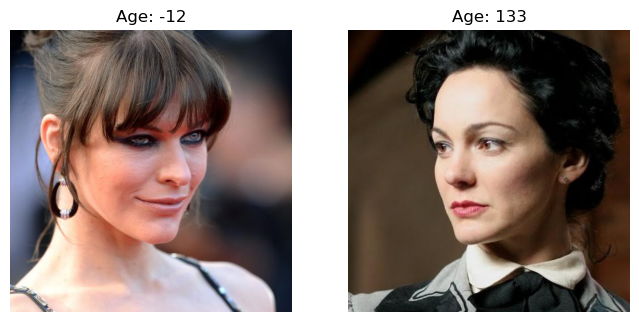

AgeError: Definitely, these ladies are not that age :D


In [561]:
# We can look at some photos and see what someone who is -12 and 133 years old looks like :D

def get_selected_path(age, invalid_age_rows):
    """
    Function retrieves the file path based on the specified age from the DataFrame.

    Parameters:
    - age: The age for which we are seeking the file path.
    - invalid_age_rows: DataFrame containing information about files and their corresponding ages.

    Returns:
    - The file path for the given age if it exists, otherwise returns None.
    """
    selected_path = invalid_age_rows.loc[invalid_age_rows['age'] == age, 'path'].head(1).values
    return selected_path[0] if selected_path else None

selected_age_first = -12
selected_age_second = 133

selected_path_first = get_selected_path(selected_age_first, invalid_age_rows)
#print(selected_path_first)
selected_path_second = get_selected_path(selected_age_second, invalid_age_rows)
#print(selected_path_second)

img1 = Image.open(selected_path_first)
img2 = Image.open(selected_path_second)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img1)
axs[0].set_title(f'Age: {selected_age_first}')
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].set_title(f'Age: {selected_age_second}')
axs[1].axis('off')

plt.show()

print('AgeError: Definitely, these ladies are not that age :D')

In [562]:
# # Remove these rows from the original 'df_metadata' DataFrame -----> this is only after the whole EDA

# df_metadata_cleaned = df_metadata.drop(invalid_age_rows.index)
# df_metadata_cleaned # After correcting the irregularities, there are now 224577 rows (224840 - 263)

In [563]:
# Check if there are any values other than 'male' and 'female' in the 'gender' column

all_unique_gender = df_metadata['gender'].unique()
print(all_unique_gender)

['male' 'female']


In [564]:
descriptive_statistics = (df_metadata['gender']).describe()
print(descriptive_statistics)

count     224840
unique         2
top         male
freq      129729
Name: gender, dtype: object


In [565]:
# Count occurrences and calculate the ratio of female and male gender in the DataFrame

column_gender = 'gender'
value_counts = df_metadata[column_gender].value_counts()
ratio_counts = value_counts / len(df_metadata)

for value, count, ratio in zip(value_counts.index, value_counts, ratio_counts):
    print(f"Value: {value}, Number of appearances: {count}, Ratio: {ratio:.2%}")

Value: male, Number of appearances: 129729, Ratio: 57.70%
Value: female, Number of appearances: 95111, Ratio: 42.30%


In [566]:
# We can see how many faces there are between 100 and 122 years old

pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

people_between_100_and_122_age = df_metadata.query('100 <= age <= 122')
people_between_100_and_122_age

,age,gender,path,face_score1
55572,112,male,D:\ProjectMLDataScience\human-age-detection\tr...,4.058691
115833,118,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.241544
153634,105,female,D:\ProjectMLDataScience\human-age-detection\tr...,1.954850
183738,109,female,D:\ProjectMLDataScience\human-age-detection\tr...,1.764811
185157,111,male,D:\ProjectMLDataScience\human-age-detection\tr...,0.927151
185228,103,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.848311
186409,113,male,D:\ProjectMLDataScience\human-age-detection\tr...,0.777204
186631,112,female,D:\ProjectMLDataScience\human-age-detection\tr...,2.818130
187554,102,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.530178
190515,100,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.446329


In [567]:
people_between_100_and_122_age.info() # 38 tagged faces between 100 and 122 years old

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 55572 to 224820
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          38 non-null     int64  
 1   gender       38 non-null     object 
 2   path         38 non-null     object 
 3   face_score1  38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [568]:
# We can see unique age values in the entire set (faces with unique ages)

all_unique_age = df_metadata['age'].unique()
print('Unique age numbers:\n\n', all_unique_age)
print('\nThe number of these special people:', len(all_unique_age))

Unique age numbers:

 [ 68  79  49  82  81  66  85  65  80  28  30  84  58  47  38  71  69  41
  39  51  53  37  43  61  40  59  77  93  52  86  48  42  62  67  64  60
  87  91  75  72  34  33  31  46  44  70  74  55  57  50  63  56  32  35
  29  73  36  45  76  26  83  54  25  97  22  27  78  24  21  23  18  10
  20  19  17   6   8  16  15  13  14  12 -12  11   9   0  -6   3  88  92
   7   4   5  89  90  94  95 112 -15 -10   2  -1  98  -2 -16 -17   1 -11
 133 130  -8  -9 -30 118  -4  -7  -3  96 -14  -5 -19 -20 -24 105 -13 109
 111 103 124 113  99 102 100 110 140 114 268 184 107 123 119 120 186 151
 211 -39 108 429 256 101 249 156 149 -26 209]

The number of these special people: 155


In [569]:
# We also see unique values in the age range 100 to 122 inclusive

quantity_of_values_between_1_and_122 = 0

print('Unique age numbers between 100 and 122 inclusive:\n')

for value in all_unique_age:
    if 1 <= value < 123:
        print(value)
        quantity_of_values_between_1_and_122 += 1

print('\nThe number of these special people (between 100 and 122):', quantity_of_values_between_1_and_122)

Unique age numbers between 100 and 122 inclusive:

68
79
49
82
81
66
85
65
80
28
30
84
58
47
38
71
69
41
39
51
53
37
43
61
40
59
77
93
52
86
48
42
62
67
64
60
87
91
75
72
34
33
31
46
44
70
74
55
57
50
63
56
32
35
29
73
36
45
76
26
83
54
25
97
22
27
78
24
21
23
18
10
20
19
17
6
8
16
15
13
14
12
11
9
3
88
92
7
4
5
89
90
94
95
112
2
98
1
118
96
105
109
111
103
113
99
102
100
110
114
107
119
120
108
101

The number of these special people (between 100 and 122): 115


In [570]:
# przejdz po wszystkich rekordach dataframu gdxie jest powyzej 105 roku zycia, sprawdz NaN
# UNIQUE VALUES , sprawdz dla dtafrmae czy w kolumnie gender i age jest cos innego 

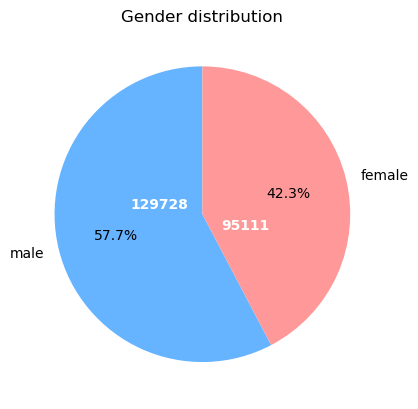

In [571]:
# Visualizing the gender distribution using a pie chart with percentages and counts

colors = ['#66b3ff', '#ff9999']

gender_counts = df_metadata['gender'].value_counts()
pie_chart = gender_counts.plot.pie(colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Gender distribution')

plt.ylabel('')

# Add counts inside each wedge with an offset below the chart
for wedge in pie_chart.patches:
    angle = (wedge.theta2 - wedge.theta1)
    percentage = angle / 360.0
    count = int(percentage * len(df_metadata))

    # Offset to avoid overlapping, moving the text below the chart
    offset_x = wedge.center[0] + 0.3 * np.cos(np.radians((wedge.theta1 + wedge.theta2) / 2))
    offset_y = wedge.center[1] - 0.3 * np.sin(np.radians((wedge.theta1 + wedge.theta2) / 2))

    pie_chart.annotate(f"{count}",
                       (offset_x, offset_y),
                       ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.show()

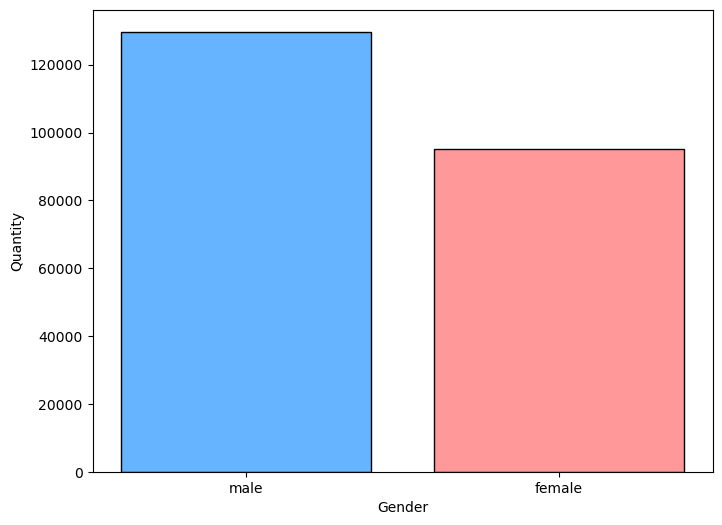

In [572]:
# Visualize gender distribution using a histogram

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, df_metadata['gender'].value_counts(), color=colors, edgecolor='black')
#plt.xticks(rotation='0', ha='center')
plt.xlabel('Gender')
plt.ylabel('Quantity')

plt.show()

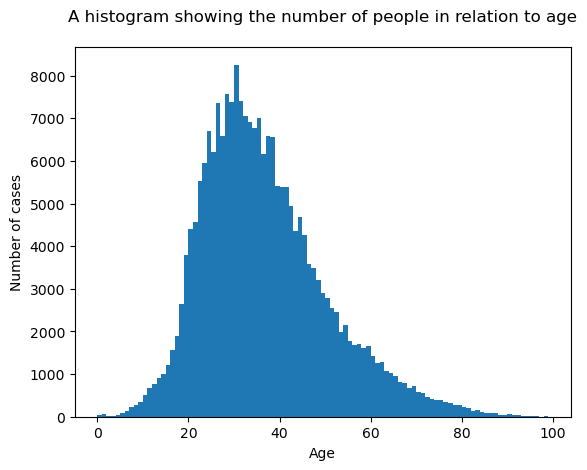

In [573]:
plt.hist(df_metadata['age'], range(100))
plt.xlabel('Age')
plt.ylabel('Number of cases')
plt.title('A histogram showing the number of people in relation to age\n')
plt.show()

In [574]:
""""
We will perform the Shapiro-Wilk test to check whether the sample (the 'age' column) comes from a normal distribution.
---> Null hypothesis (H0): data come from a normal distribution
---> Alternative hypothesis (HA): the data do not come from a normal distribution
"""

statistic, p_value = stats.shapiro(df_metadata['age'])

alpha = 0.05 # In biological sciences, we assume a significance level of = 0.05 or less

if p_value > alpha:
    print(f'P-value: {p_value:.3f}. No grounds to reject H0. The data may come from a normal distribution.')
else:
    print(f'P-value: {p_value:.3f}. Accept HA (rejecting H0). The data does not come from a normal distribution.')


P-value: 0.000. Accept HA (rejecting H0). The data does not come from a normal distribution.


c:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [575]:
# Create an 'age category' column to illustrate and divide the number of faces with a given detected age into groups

df_metadata_with_agecategory = df_metadata[['age', 'gender', 'path', 'face_score1']]

bins = [1, 19, 39, 59, 79, 120] # Define age category boundaries
labels = ['1-19', '20-39', '40-59', '60-79', '80-120'] # Define labels for each age category
df_metadata_with_agecategory['age category'] = pd.cut(df_metadata_with_agecategory['age'], bins=bins, labels=labels, right=True) # Add a new column 'age category' to the DataFrame
pd.DataFrame(df_metadata_with_agecategory[:20])

,age,gender,path,face_score1,age category
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117,60-79
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766,60-79
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189,60-79
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171,60-79
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431,40-59
5,82,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.482030,80-120
6,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.865421,40-59
7,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,5.414545,80-120
8,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.360469,80-120
9,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.559209,60-79


In [576]:
women_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'female', 'age']
men_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'male', 'age']

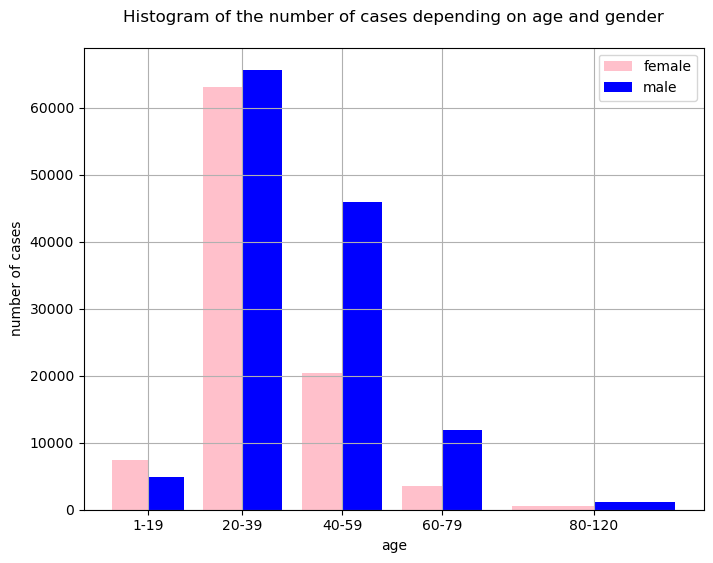

In [577]:
# Create a histogram of the number of cases depending on age and gender

plt.figure(figsize=(8, 6))
plt.hist([women_age, men_age], bins=bins, color=['pink', 'blue'], label=['female', 'male'])

bin_centers = 0.5 * np.diff(bins) + bins[:-1] # Use 'bin_centers' to get the center of each age range as a place for the label. This should correct the unevenness of the labels on the X axis
    
plt.xticks(bin_centers, labels)
plt.xlabel('age')
plt.ylabel('number of cases')
plt.title('Histogram of the number of cases depending on age and gender\n')
plt.legend()
plt.grid()
plt.show()

In [578]:
# # Check the correctness of the chart. Compare values

# selected_rows = df_metadata_with_agecategory.loc[(df_metadata_with_agecategory['age category'] == '40-59') & (df_metadata_with_agecategory['gender'] == 'female')]
# selected_rows.info() # 9720 entries: good

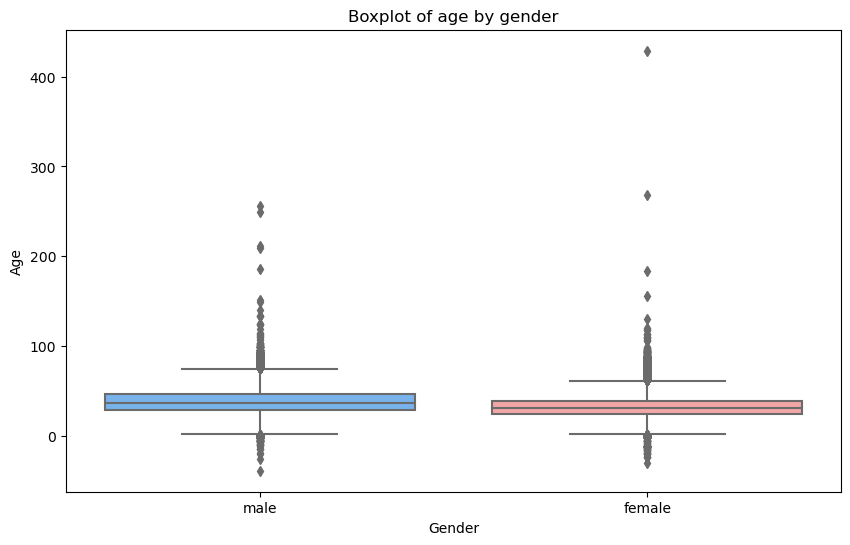

In [579]:
# Create a boxplot of age by gender

# As we can deduce from the previous analysis, we see a lot of outliers in the 'metadata.csv' dataset

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df_metadata, palette=colors)

plt.title('Boxplot of age by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

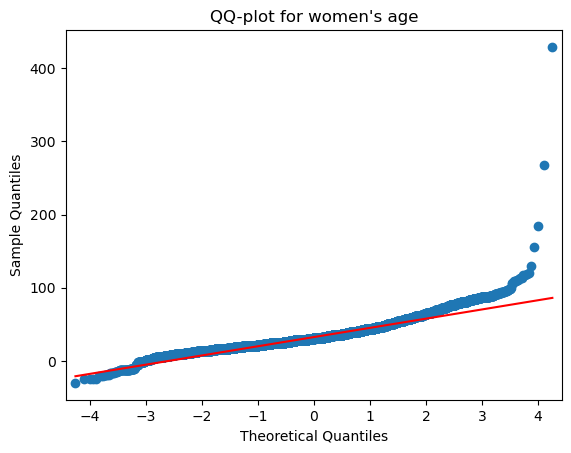

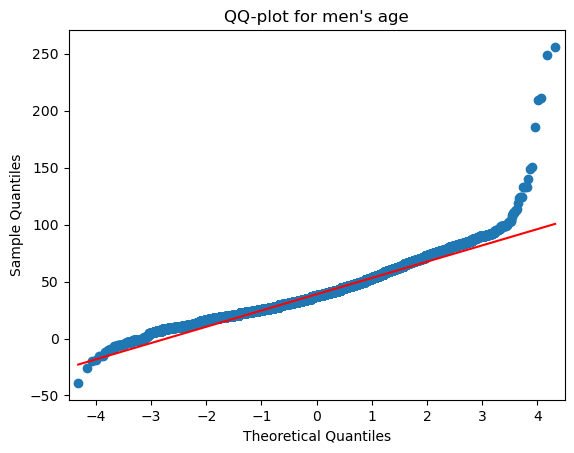

In [580]:
data_female = df_metadata[df_metadata['gender'] == 'female']['age']
data_male = df_metadata[df_metadata['gender'] == 'male']['age']

# QQ-plot dla kobiet
sm.qqplot(data_female, line='s')
plt.title("QQ-plot for women's age")
plt.show()

# QQ-plot dla mężczyzn
sm.qqplot(data_male, line='s')
plt.title("QQ-plot for men's age")
plt.show()

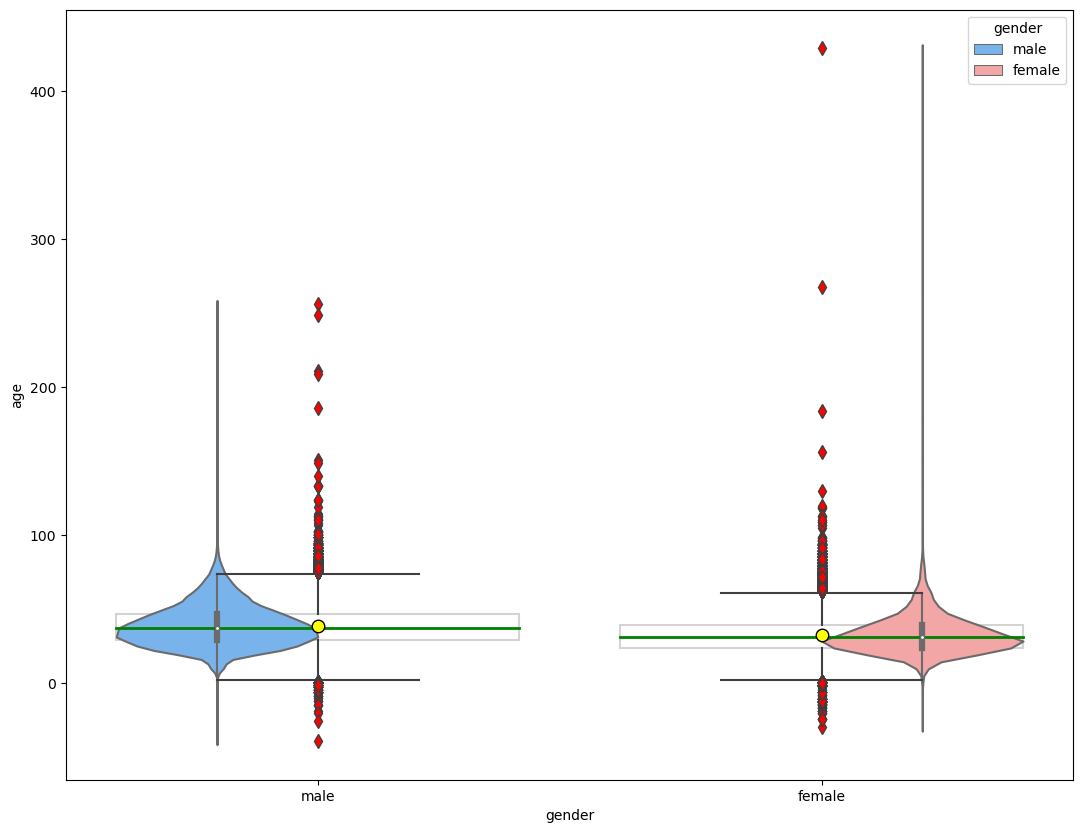

In [581]:
fig, ax = plt.subplots(figsize=(13, 10))

sns.violinplot(x='gender', y='age', data=df_metadata, hue='gender', palette=colors)


sns.boxplot(x='gender', y='age', data=df_metadata, showmeans=True,
           boxprops=dict(facecolor='none', edgecolor='lightgrey'),
           meanprops=dict(marker='o', markerfacecolor='yellow', markeredgecolor='black', markersize=9),
           medianprops=dict(linewidth=2, color='green'),
           flierprops = dict(markerfacecolor='red', markersize=7, linestyle='none'))

plt.show()

In [582]:
# Calculate the values of skewness and kurtosis

# Skewness > 0: right-skewed asymmetry
# Kurtosis > 0: heavier tails than in a normal distribution (more "peaky" distribution)

skewness_male = stats.skew(data_male)
skewness_female = stats.skew(data_female)

kurtosis_male = stats.kurtosis(data_male)
kurtosis_female = stats.kurtosis(data_female)

print('Skewness value for the age distribution for women:', skewness_female, '\nSkewness value for the age distribution for men:', skewness_male)
print('\nKurtosis value for the age distribution for women:', kurtosis_female, '\nKurtosis value for the age distribution for men:', kurtosis_male)

Skewness value for the age distribution for women: 1.41769858324992 
Skewness value for the age distribution for men: 0.7393653052797579

Kurtosis value for the age distribution for women: 13.906531722096794 
Kurtosis value for the age distribution for men: 1.732015744475425


In [583]:
min(df_metadata['face_score1'])

0.7309190847140404

In [584]:
max(df_metadata['face_score1'])

7.381688760972821

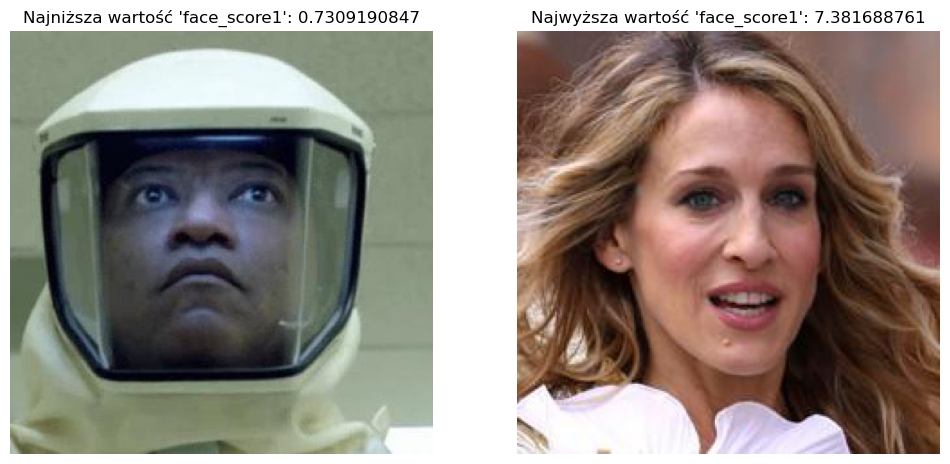

In [585]:
# Compare the two images with the lowest and highest values in the 'face_score1' column (face_score1 is detector score (the higher the better))
# ---> As you can see, the face in this image with the lowest value was the least recognized (probably due to the visible helmet)

# Find the indexes for the lowest and highest values in the 'face_score1' column
min_index = df_metadata['face_score1'].idxmin()
max_index = df_metadata['face_score1'].idxmax()

# Display the lowest value of face_score1 and the corresponding jpg file
min_image_path = df_metadata.loc[min_index, 'path']
min_image = Image.open(min_image_path)

# Display the highest value of face_score1 and the corresponding jpg file
max_image_path = df_metadata.loc[max_index, 'path']
max_image = Image.open(max_image_path)

min_score_rounded = round(df_metadata.loc[min_index, 'face_score1'], 10)
#print(min_score_rounded)
max_score_rounded = round(df_metadata.loc[max_index, 'face_score1'], 10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(min_image)
axes[0].set_title(f"Najniższa wartość 'face_score1': {min_score_rounded}")
axes[0].axis('off')

axes[1].imshow(max_image)
axes[1].set_title(f"Najwyższa wartość 'face_score1': {max_score_rounded}")
axes[1].axis('off')

plt.show()

In [586]:
# # List of image files in the directory
# image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

In [587]:
# len(image_files) # Number of image files in the directory

In [588]:
# # This function is used to display several (user-specified number) images from the selected directory
# def display_images(images, num_cols=4):
#     num_images = len(images)
#     num_rows = (num_images + num_cols - 1) // num_cols
#     plt.figure(figsize=(12, 8))
#     for i, image_file in enumerate(images):
#         img = Image.open(os.path.join(directory, image_file))
#         plt.subplot(num_rows, num_cols, i + 1)
#         plt.imshow(img)
#         plt.title(image_file, fontdict = {'fontsize' : 6})
#         plt.axis('off')
#     plt.show()

In [589]:
# display_images(image_files[:4])

In [590]:
# # Przykładowe statystyki o obrazach
# for image_file in image_files[:8]:
#     img = Image.open(os.path.join(directory, image_file))
#     width, height = img.size
#     mode = img.mode
#     print(f'File name: {image_file}, Size: {width}x{height}, Mode: {mode}')

In [591]:
# mean_color = np.mean(image_file, axis=(0, 1))
# print(f"Średni kolor (BGR) {image_file}: {mean_color}")